<a href="https://colab.research.google.com/github/AahanKar/Aahan/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install necessary packages
!pip install pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Ensure inline plotting
%matplotlib inline




In [2]:
HouseDF = pd.read_csv('Housing.csv')

In [3]:
HouseDF.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
1,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
2,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
3,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
4,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished


In [5]:
HouseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             506 non-null    int64 
 1   area              506 non-null    int64 
 2   bedrooms          506 non-null    int64 
 3   bathrooms         506 non-null    int64 
 4   stories           506 non-null    int64 
 5   mainroad          506 non-null    object
 6   guestroom         506 non-null    object
 7   basement          506 non-null    object
 8   hotwaterheating   506 non-null    object
 9   airconditioning   506 non-null    object
 10  parking           506 non-null    int64 
 11  prefarea          506 non-null    object
 12  furnishingstatus  506 non-null    object
dtypes: int64(6), object(7)
memory usage: 51.5+ KB


In [6]:
HouseDF.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.060000e+02,506.000000,506.000000,506.000000,506.000000,506.000000
mean,4.554301e+06,4888.480237,2.893281,1.252964,1.790514,0.654150
std,1.584601e+06,1772.985335,0.657383,0.457329,0.871774,0.844875
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.395000e+06,3520.000000,2.000000,1.000000,1.000000,0.000000
50%,4.217500e+06,4500.000000,3.000000,1.000000,2.000000,0.000000
75%,5.516000e+06,6047.500000,3.000000,1.000000,2.000000,1.000000
max,9.100000e+06,10360.000000,4.000000,3.000000,4.000000,3.000000


In [7]:
HouseDF.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

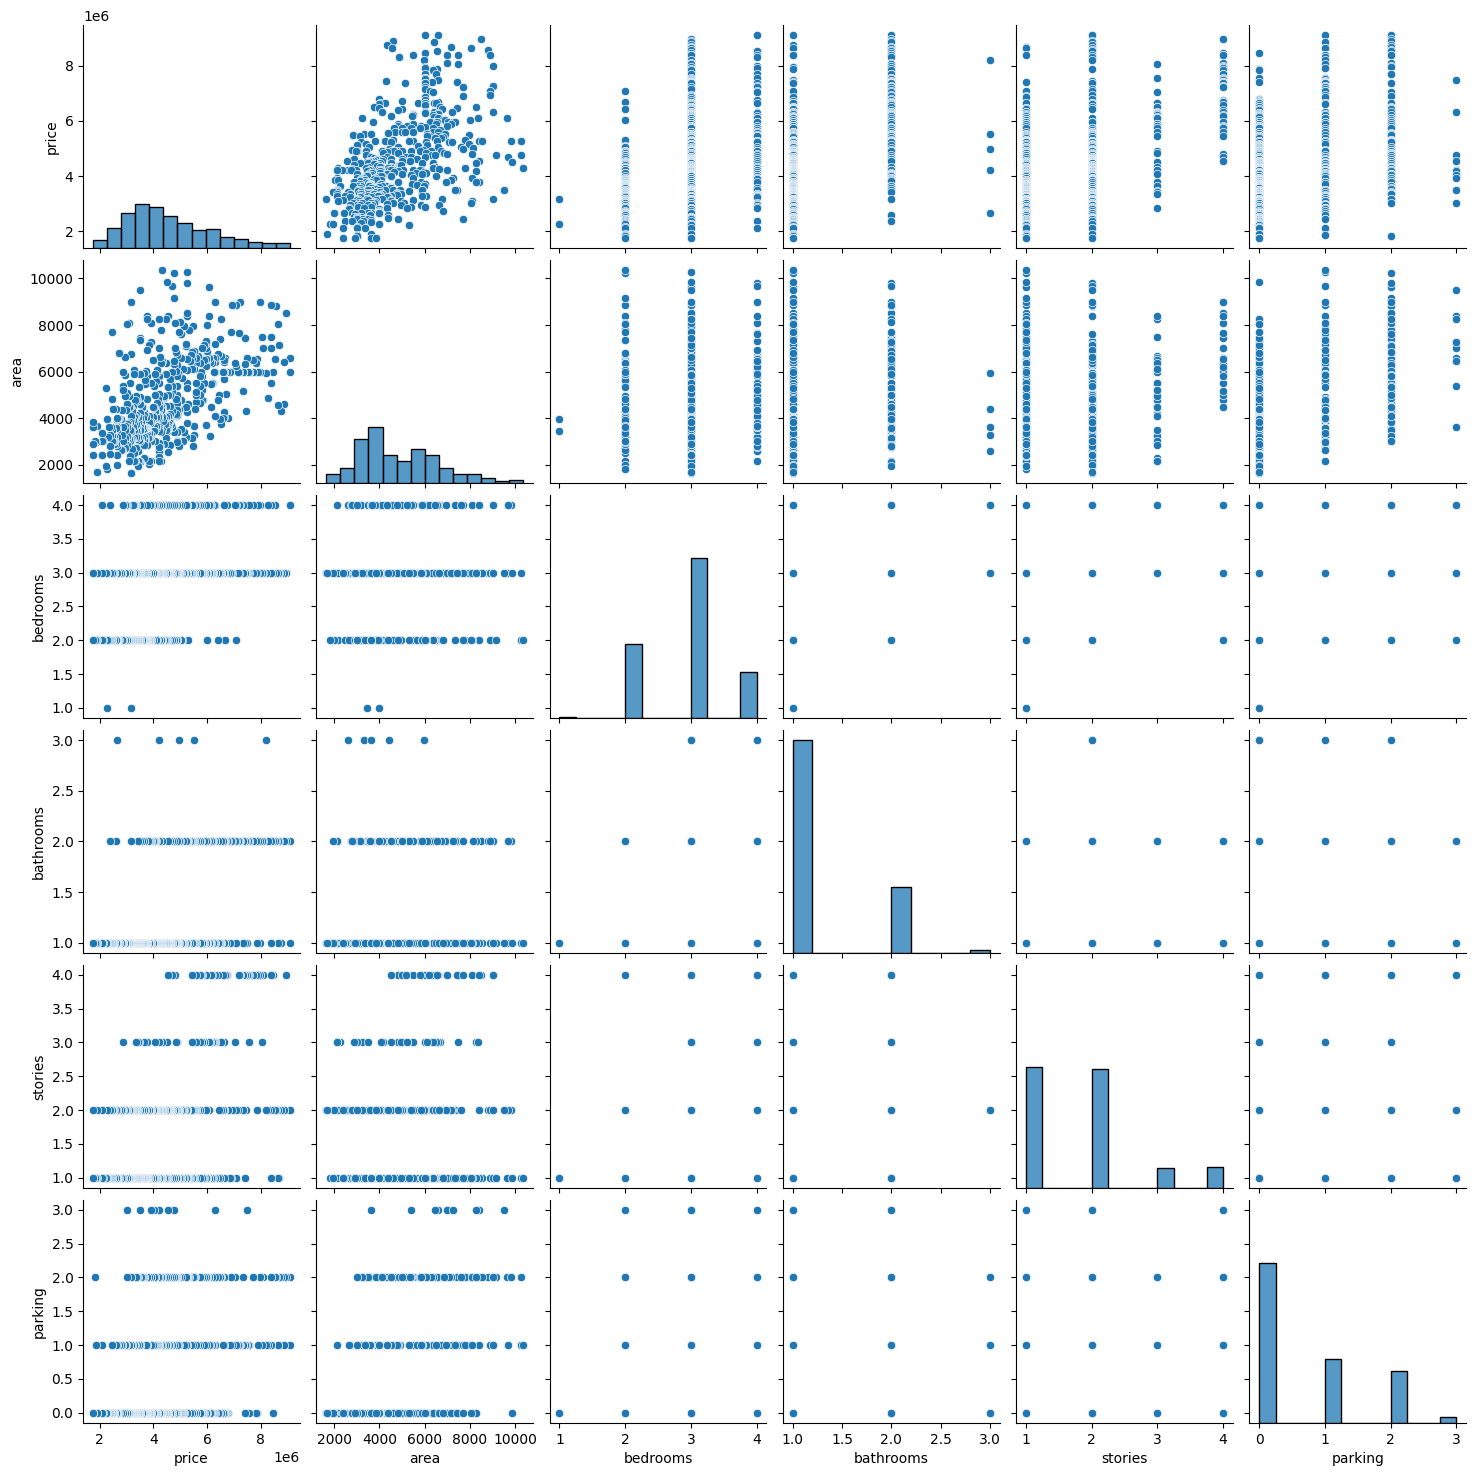

In [8]:
sns.pairplot(HouseDF)

<Axes: >

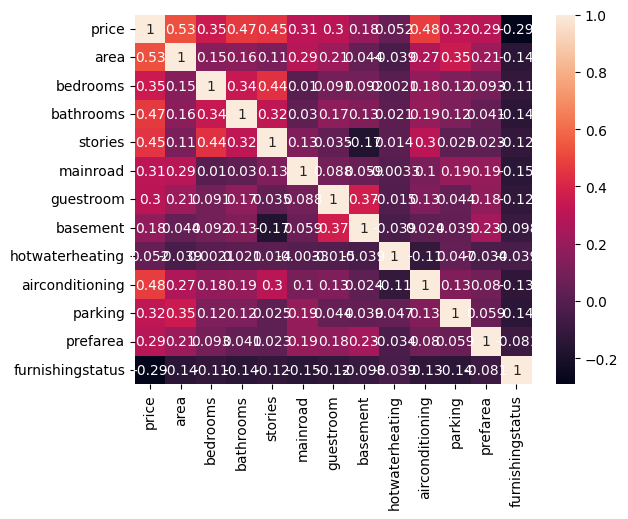

In [ ]:
# Convert 'yes'/'no' columns to numerical 0/1
HouseDF = HouseDF.replace({'yes': 1, 'no': 0})

# Identify non-numeric columns and convert to numeric if categorical
non_numeric_cols = HouseDF.select_dtypes(exclude=['number']).columns
for col in non_numeric_cols:
    if HouseDF[col].dtype == 'object':
        HouseDF[col] = HouseDF[col].astype('category').cat.codes
# Visualize correlation heatmap
sns.heatmap(HouseDF.corr(), annot=True)



In [ ]:
# Define features and target variable
x = HouseDF.drop(['price', 'furnishingstatus', 'hotwaterheating'], axis=1) # Pass labels to drop as a list
y= HouseDF['price']

In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=101)

In [ ]:
# Initialize and train the model
Lm = LinearRegression()
Lm.fit(x_train, y_train)


LinearRegression()

In [ ]:
# Display coefficients
coeff_df = pd.DataFrame(Lm.coef_, x.columns, columns=['Coefficient'])
print(coeff_df)


                   Coefficient
area                231.625243
bedrooms          90951.118835
bathrooms        775832.676244
stories          509904.744483
mainroad         423919.812902
guestroom        425197.737344
basement         338625.264490
hotwaterheating  680985.579144
airconditioning  775635.698435
parking          240223.947268
prefarea         518695.716386


In [ ]:
# Make predictions
predictions = Lm.predict(x_test)

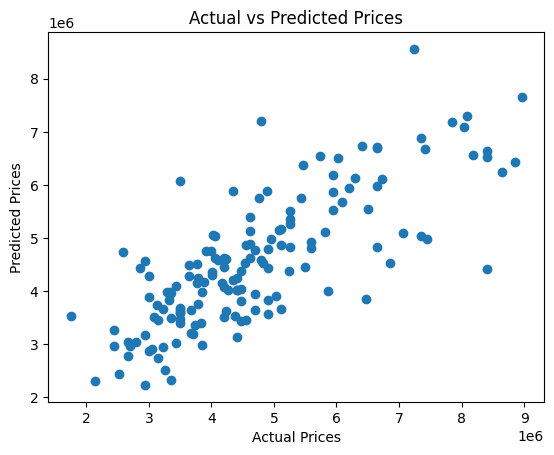

In [ ]:
# Plot predictions vs actual values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


<ipython-input-87-6aa6fd2aece1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - predictions), bins=50)


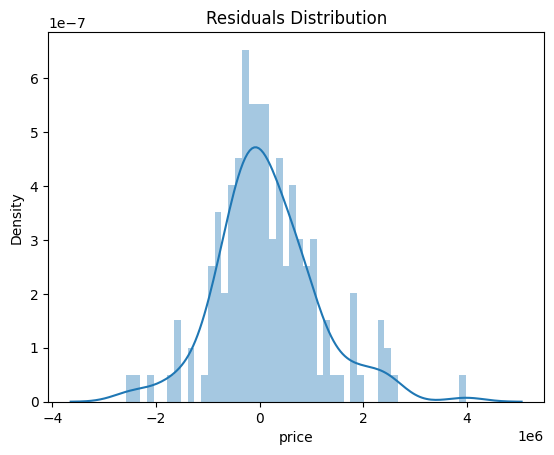

In [ ]:
# Plot residuals
sns.distplot((y_test - predictions), bins=50)
plt.title('Residuals Distribution')
plt.show()


In [ ]:
# Evaluate the model
print(f'R^2 Score: {Lm.score(x_test, y_test)}')


R^2 Score: 0.5974281496280052


In [ ]:
# Preprocessing pipeline
# Assuming 'df' is your DataFrame containing the features
!pip install scikit-learn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
# Import ColumnTransformer from the correct module
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score

# Assuming 'HouseDF' is your DataFrame and 'price' is your target column
X = HouseDF.drop(['price', 'hotwaterheating'], axis=1)  # Remove the target variable from features
y = HouseDF['price']  # Assign the target variable to y

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Add a random state for reproducibility

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])

scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')

# Print the cross-validation scores
best_r2 = max(scores)
print("Best R^2:", best_r2)

Best R^2: 0.6744695089855821


In [ ]:
# Feature Engineering: Add polynomial features
feature_names = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'airconditioning', 'parking', 'prefarea']
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(HouseDF[feature_names])

# Update feature names to include polynomial terms
poly_feature_names = poly.get_feature_names_out(feature_names)
df_poly = pd.DataFrame(X_poly, columns=poly_feature_names)

# Import necessary classes and functions
from sklearn.feature_selection import SelectKBest, f_regression

# Feature Selection: Select top k features based on f_regression
k = 10  # Number of top features to select
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(df_poly, y)

# Get the selected feature names
selected_feature_names = poly_feature_names[selector.get_support()]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Evaluate the model
r2_train = model.score(X_train_scaled, y_train)
r2_test = model.score(X_test_scaled, y_test)

print("Selected Features:", selected_feature_names)
print("Training R^2:", r2_train)
print("Testing R^2:", r2_test)

Selected Features: ['price^2' 'price area' 'price bedrooms' 'price bathrooms' 'price stories'
 'price mainroad' 'price airconditioning' 'area bedrooms' 'area bathrooms'
 'area stories']
Training R^2: 0.9802480560905164
Testing R^2: 0.9784207581894102
